# Inicialización de matrices y funciones

In [1]:
import pandas as pd
import math
import numpy as np
import warnings
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error,confusion_matrix, f1_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from google.colab import data_table

plt.figure(figsize=(15, 10))
# Filtrar los mensajes FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
#carga de datos del csv 
def google_spreadsheet_url(id):
  """
  Función para obtener la URL de descarga de un Google Spreadsheet público
  con la ID del mismo
  """
  url = f'https://docs.google.com/spreadsheets/d/{id}/gviz/tq?tqx=out:csv'
  print(url)
  return url

ID="1WlpuyGiI4LVVCyDRfsJcwX6lBLP3x7Ftab_BIHwRPFE"
data = pd.read_csv(google_spreadsheet_url(ID))
data.head()

https://docs.google.com/spreadsheets/d/1WlpuyGiI4LVVCyDRfsJcwX6lBLP3x7Ftab_BIHwRPFE/gviz/tq?tqx=out:csv


,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,28.02.2023,"3.970,15","3.977,19","3.997,50","3.968,98",NaN,"-0,30%"
1,27.02.2023,"3.982,24","3.992,36","4.018,05","3.973,55",NaN,"0,31%"
2,24.02.2023,"3.970,04","3.973,24","3.978,25","3.943,08",NaN,"-1,05%"
3,23.02.2023,"4.012,32","4.018,60","4.028,30","3.969,19",NaN,"0,53%"
4,22.02.2023,"3.991,05","4.001,83","4.017,37","3.976,90",NaN,"-0,16%"


<Figure size 1080x720 with 0 Axes>

In [2]:
# abarcamos todos los datos ya que no hay ninguna limitación hay 542
test_data = data.iloc[::-1,:] # le damos la vuelta para ponerlo de orden cronológico
#valores de cierre
CierresTest = test_data.iloc[:, 1] #obtener unicamente la columna de cierre de cotizacion

In [3]:
#funcion para cambiar los valores ya que tienen puntos y comas y no deja castear a float de golpe
def castearFloat(elemento):
  x=elemento.split(".")[0]#izquierda del punto
  y=elemento.split(".")[1]#derecha del punto
  resultado=x+y #concatenacion de la cadena
  z=float(resultado.replace(",","."))#cambio de la , por el punto y casteo a float
  return z

#funcion para calcular las rentabilidades con los valores de cierre de la matriz
def calcularRentabilidades(matrizValoresCierres):
  matrizRentabilidades=[]
  BackupDATOS=[]
  for i in matrizValoresCierres:
    BackupDATOS.append(castearFloat(i))
    if(len(BackupDATOS)>=2):
      operacion=(BackupDATOS[1]-BackupDATOS[0])/BackupDATOS[0]
      matrizRentabilidades.append(operacion)
      BackupDATOS.pop(0)
  return matrizRentabilidades

def calculoModelo(matrizRentabilidades,dia):
  matrizRtN=[]    
  for y in range(0,dia):
    matrizRtN.append(None)
  for i in range(0,len(matrizRentabilidades)):
    matrizRtN.append(matrizRentabilidades[i])
  columnaId=str("Rt"+str(dia)) #codigo para poner el nombre en la columna
  return pd.DataFrame(matrizRtN,columns=[columnaId])

In [4]:
rentabilidades = calcularRentabilidades(CierresTest)
rentabilidades1=calculoModelo(rentabilidades,1)
rentabilidades2=calculoModelo(rentabilidades,2)
rentabilidades3=calculoModelo(rentabilidades,3)
rentabilidades4=calculoModelo(rentabilidades,4)
rentabilidades5=calculoModelo(rentabilidades,5)
ones=pd.DataFrame(np.ones(rentabilidades1.shape[0]),columns=["Ones"])#crear la columna de Ones

#matriz para visualizar los datos LIMPIOS con la que trabajamos
matriz_entera = pd.concat([ones,rentabilidades1,rentabilidades2,rentabilidades3,rentabilidades4,rentabilidades5],axis=1)
#limpiar las celdas incompletas NaN
matriz_entera=matriz_entera.iloc[:-5]#quitamos los 5 NaN de abajo
matriz_entera=matriz_entera.iloc[5:]#quitamos los 5 NaN de arriba

print("\n----------------Variable Dependiente----------------\ \n")
RentabilidadesY=pd.DataFrame(rentabilidades[5:],columns=["Rt"]) #convertirmos a dataframe para operar como con las otras
print(RentabilidadesY)
print("\n----------------Variables Independientes----------------\ \n")
print(matriz_entera)


----------------Variable Dependiente----------------\ 

           Rt
0    0.000416
1    0.002276
2   -0.003753
3   -0.007190
4    0.008136
..        ...
531 -0.001574
532  0.005329
533 -0.010538
534  0.003073
535 -0.003036

[536 rows x 1 columns]

----------------Variables Independientes----------------\ 

     Ones       Rt1       Rt2       Rt3       Rt4       Rt5
5     1.0 -0.006555  0.005492  0.014847  0.005710  0.007083
6     1.0  0.000416 -0.006555  0.005492  0.014847  0.005710
7     1.0  0.002276  0.000416 -0.006555  0.005492  0.014847
8     1.0 -0.003753  0.002276  0.000416 -0.006555  0.005492
9     1.0 -0.007190 -0.003753  0.002276  0.000416 -0.006555
..    ...       ...       ...       ...       ...       ...
536   1.0 -0.020041 -0.002767 -0.013789  0.002773 -0.000280
537   1.0 -0.001574 -0.020041 -0.002767 -0.013789  0.002773
538   1.0  0.005329 -0.001574 -0.020041 -0.002767 -0.013789
539   1.0 -0.010538  0.005329 -0.001574 -0.020041 -0.002767
540   1.0  0.003073 -0.010538 

# Ejercicios

3. Una vez implementado dicho modelo el alumno deberá producir dos columnas, una con el rendimiento real del activo y otra con el rendimiento predicho y sobre ambas calcular tres métricas: el mse, el mae y el mape. Las tres métricas, proporcionan los mismos resultados (el mismo valor)?


In [5]:
VariablesIndependientes=matriz_entera
VariablesDependientes=RentabilidadesY

x_train, x_test, y_train, y_test = train_test_split(VariablesIndependientes, VariablesDependientes, train_size = 0.8, test_size = 0.2,random_state=0,shuffle=False)
# Creamos el objeto de Regresión Linear
modelo_rm = LinearRegression()
# Entrenamos nuestro modelo
modelo_rm.fit(x_train, y_train)
# Hacemos las predicciones
y_pred = modelo_rm.predict(x_test)

a = modelo_rm.intercept_

b1 = modelo_rm.coef_[0, 1:2]
b2 = modelo_rm.coef_[0, 2:3]
b3 = modelo_rm.coef_[0, 3:4]
b4 = modelo_rm.coef_[0, 4:5]
b5 = modelo_rm.coef_[0, 5:6]

print ("valor de a =",a,"b1 =",b1,"b2 =",b2,"b3 =", b3,"b4 =", b4, "b5 =",b5)
print("\nModelo Implementado--> Y =",a," + Rt1 *",b1," + Rt2 *",b2," + Rt3 *",b3," + Rt4 *",b4," + Rt5 *",b5)
print('\nMetricas del modelo:')
#Evaluamos
print("\nExactitud Modelo Lineal: {:.4f}".format(modelo_rm.score(x_train, y_train)))
print(f"\nMAE: {mean_absolute_error(y_test,y_pred):.6f}" )
print(f"MSE: {mean_squared_error(y_test, y_pred):.6f}" )
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.6f}" )

valor de a = [5.38040186e-05] b1 = [-0.00209109] b2 = [-0.0206224] b3 = [-0.02825086] b4 = [0.01119571] b5 = [-0.03612535]

Modelo Implementado--> Y = [5.38040186e-05]  + Rt1 * [-0.00209109]  + Rt2 * [-0.0206224]  + Rt3 * [-0.02825086]  + Rt4 * [0.01119571]  + Rt5 * [-0.03612535]

Metricas del modelo:

Exactitud Modelo Lineal: 0.0026

MAE: 0.010916
MSE: 0.000195
MAPE: 0.982741


4. Suponga que comparamos las predicciones frente a un paseo aleatorio rt=0
empleando el mape, las predicciones del modelo lineal son mejores?

In [6]:
# Parámetros de la distribución
model = LinearRegression()
model.fit(x_train, y_train)

# Predice las ventas con el modelo lineal
y_pred = model.predict(x_test)

# Genera un paseo aleatorio con la misma longitud que y_test
y_random = np.random.choice(y_train.values.ravel(), size=len(y_test), replace=True)

# Por último, calculamos el error cuadrático medio y el estadístico R^2
print("\n---------MAE---------")
print(f"Paseo Aleatorio : {mean_absolute_error(y_test,y_random):.6f}")
print(f"Lineal: {mean_absolute_error(y_test,y_pred):.6f}")

print("\n---------MSE----------")
print(f"Paseo Aleatorio: {mean_squared_error(y_test,y_random):.6f}" )
print(f"Lineal: {mean_squared_error(y_test, y_pred):.6f}" )

print("\n---------MAPE---------")
print(f"Paseo Aleatorio: {mean_absolute_percentage_error(y_test,y_random):.6f}" )
print(f"Lineal: {mean_absolute_percentage_error(y_test, y_pred):.6f}")


---------MAE---------
Paseo Aleatorio : 0.013216
Lineal: 0.010916

---------MSE----------
Paseo Aleatorio: 0.000296
Lineal: 0.000195

---------MAPE---------
Paseo Aleatorio: 2.839731
Lineal: 0.982741


5. Encuentre, sobre el conjunto de entrenamiento y empleando validación cruzada
(10 conjuntos) el mejor modelo de vecinos próximos (algoritmo knn)
empleando entre 1 y 15 vecinos. Con el modelo óptimo calcule el ecm sobre el
conjunto de test y compárelo con un paseo aleatorio. Es mejor o peor que un
paseo aleatorio? (2.25 puntos)

Exactitud knn: 0.08

ECM en el conjunto de KNN: 0.000121
ECM en el conjunto de paseo Aleatorio: 0.000181

El número optimo de vecinos son: 13


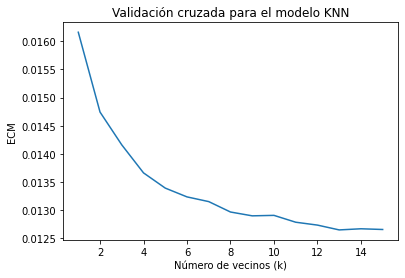

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(VariablesIndependientes, VariablesDependientes, train_size = 0.9254, test_size = 0.0746,random_state=0,shuffle=False)
# Realizar la validación cruzada para encontrar el mejor modelo KNN
scores = []
for k in range(1, 16):
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    scores.append((-1 * cv_scores.mean()) ** 0.5)

# Encontrar el número óptimo de vecinos
optimal_k = np.argmin(scores) + 1 #el +1 está por si sale 0 tiene que ser mínimo como 1

# Entrenar el modelo KNN óptimo en el conjunto de entrenamiento completo
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Genera un paseo aleatorio con la misma longitud que y_test
y_random = np.random.choice(y_train.values.ravel(), size=len(y_test), replace=True)

# Calcular la prediccion en el conjunto de prueba
y_pred = knn.predict(X_test)
ecmKNN = mean_squared_error(y_test, y_pred)#cakculamos ecm de KNN
ecmAleatorio = mean_squared_error(y_test, y_random)#cakculamos ecmde PaseoAleatorio
#Evaluamos
accuracy_train=knn.score(X_train,y_train)
print ("Exactitud knn: {:.2f}".format(accuracy_train))
print(f"\nECM en el conjunto de KNN: {ecmKNN:.6f}")
print(f"ECM en el conjunto de paseo Aleatorio: {ecmAleatorio:.6f}")

print("\nEl número optimo de vecinos son:", optimal_k)
# Graficar los resultados
plt.plot(range(1, 16), scores)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('ECM')
plt.title('Validación cruzada para el modelo KNN')
plt.show()

6. Emplando el mismo procedimiento, métrica y benchmark con un árbol de
regresión con una profundidad entre 1 y 10 niveles. Es mejor o peor que un
paseo aleatorio? (2.25 puntos)


Profundidad del árbol: 1
ECM en - Árbol: 0.000100
ECM en - Paseo aleatorio: 0.000340

Profundidad del árbol: 2
ECM en - Árbol: 0.000098
ECM en - Paseo aleatorio: 0.000207

Profundidad del árbol: 3
ECM en - Árbol: 0.000098
ECM en - Paseo aleatorio: 0.000286

Profundidad del árbol: 4
ECM en - Árbol: 0.000098
ECM en - Paseo aleatorio: 0.000223

Profundidad del árbol: 5
ECM en - Árbol: 0.000102
ECM en - Paseo aleatorio: 0.000259

Profundidad del árbol: 6
ECM en - Árbol: 0.000100
ECM en - Paseo aleatorio: 0.000217

Profundidad del árbol: 7
ECM en - Árbol: 0.000110
ECM en - Paseo aleatorio: 0.000201

Profundidad del árbol: 8
ECM en - Árbol: 0.000123
ECM en - Paseo aleatorio: 0.000145

Profundidad del árbol: 9
ECM en - Árbol: 0.000151
ECM en - Paseo aleatorio: 0.000287

Profundidad del árbol: 10
ECM en - Árbol: 0.000219
ECM en - Paseo aleatorio: 0.000205

Exactitud arbol: 0.50



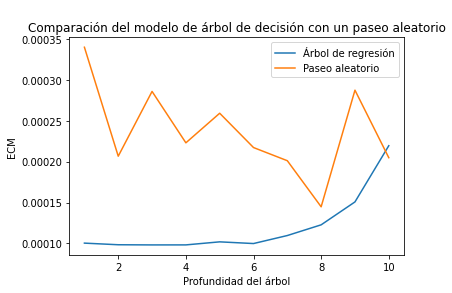

In [8]:
# Crear una lista para almacenar los ECM para cada modelo
tree_scores = []
random_walk_scores = []

# Probar diferentes profundidades del árbol de decisión
for depth in range(1, 11):
    # Crear y ajustar un modelo de árbol de decisión
    tree = DecisionTreeRegressor(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)

    # Realizar validación cruzada para evaluar el modelo
    cv_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

    # Evaluar el modelo en el conjunto de prueba
    y_pred = tree.predict(X_test)
    tree_score = mean_squared_error(y_test, y_pred)
    tree_scores.append(tree_score)

    # Realizar un paseo aleatorio y evaluar el error cuadrático medio
    y_random = np.random.choice(y_train.values.ravel(), size=len(y_test), replace=True)
    random_walk_score = mean_squared_error(y_test, y_random)
    random_walk_scores.append(random_walk_score)

    # Mostrar los resultados de cada iteración
    print(f"\nProfundidad del árbol: {depth}")
    print(f"ECM en - Árbol: {tree_score:.6f}")
    print(f"ECM en - Paseo aleatorio: {random_walk_score:.6f}")

#Evaluamos
accuracy_train=tree.score(X_train,y_train)
print ("\nExactitud arbol: {:.2f}\n".format(accuracy_train))
# Graficar los resultados
plt.plot(range(1, 11), tree_scores, label='Árbol de regresión')
plt.plot(range(1, 11), random_walk_scores, label='Paseo aleatorio')
plt.xlabel('Profundidad del árbol')
plt.ylabel('ECM')
plt.title('\nComparación del modelo de árbol de decisión con un paseo aleatorio')
plt.legend()
plt.show()

7. Para la siguiente pregunta el alumno debe considerar una ventana DESLIZANTE de UN DIA, considerando únicamente las doscientas observaciones anteriores, es decir, se emplean los últimos doscientos días para predecir el siguiente, se mueve un día la ventana y se vuelve a predecir, etc., El periodo predictivo comienza el 15 de febrero de 2023 (o primer día disponible después de esa fecha) y termina el 28 de febrero de 2023 (o el día más próximo disponible en febrero). Adicionalmente, suponemos que no hay ventas en corto, es decir, solo se puede invertir en caso de una predicción de precio superior al actual. Para knn y árboles se emplearán los hiper-parámetros óptimos encontrados anteriormente, es decir NO es preciso emplear validación cruzada.La rentabilidad de cada uno de los modelos (lineal, knn y arboles) es positiva?(2.5 puntos)

In [9]:
window_size = 200
step_size = 1
days = 8
data = pd.DataFrame(rentabilidades).transpose()
def sliding_window(data):
    X = pd.DataFrame()
    y = pd.DataFrame()
    for i in range(0, days , step_size):
        next_row = data.iloc[0,i+1:i+(window_size+1)].to_frame().transpose().T.reset_index(drop=True).T #Localiza la ventana y resetea el índice para evitar desfase
        X = pd.concat([X,next_row])
        y = y.append([data.iloc[0,i]])
    return X, y

X,y = sliding_window(data)
#Volvemos a entrenar los modelos con esta nueva matriz

#Lineal
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2,random_state=0,shuffle=False)
# Parámetros de la distribución
model = LinearRegression()
model.fit(x_train, y_train)
# Predice las ventas con el modelo lineal
y_predL = model.predict(x_test)
# Genera un paseo aleatorio con la misma longitud que y_test
r2Lineal = r2_score(y_test, y_predL)
accuracy_trainLineal=model.score(x_train,y_train)
#KNN
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train, y_train)
# Calcular la prediccion en el conjunto de prueba
y_predK = knn.predict(x_test)
r2KNN = r2_score(y_test, y_predK)
accuracy_trainKNN=knn.score(x_train,y_train)
#Arbol
tree = DecisionTreeRegressor(max_depth=1, random_state=0)
tree.fit(x_train, y_train)
# Evaluar el modelo en el conjunto de prueba
y_predT = tree.predict(x_test)
r2Tree = r2_score(y_test, y_predT)
accuracy_trainTree=tree.score(x_train,y_train)

#Precision del modelo
print("\nExactitud modelo lineal: {:.4f}".format(accuracy_trainLineal))
print("\nExactitud modelo KNN: {:.4f}".format(accuracy_trainKNN))
print("\nExactitud modelo Arbol: {:.4f}".format(accuracy_trainTree))

# Por último, calculamos el error cuadrático medio y el estadístico R^2
print("\n---------MAE---------")
print(f"Lineal: {mean_absolute_error(y_test,y_predL):.6f}")
print(f"KNN: {mean_absolute_error(y_test,y_predK):.6f}" )
print(f"Árbol: {mean_absolute_error(y_test,y_predT):.6f}" )

print("\n---------MSE----------")
print(f"Lineal: {mean_squared_error(y_test, y_predL):.6f}" )
print(f"KNN: {mean_squared_error(y_test,y_predK):.6f}" )
print(f"Árbol: {mean_squared_error(y_test,y_predT):.6f}" )

print("\n---------MAPE---------")
print(f"Lineal: {mean_absolute_percentage_error(y_test, y_predL):.6f}")
print(f"KNN: {mean_absolute_percentage_error(y_test,y_predK):.6f}" )
print(f"Árbol: {mean_absolute_percentage_error(y_test,y_predT):.6f}" )

print("\n---------Coeficientes Determinacion---------")
print(f"Lineal: {r2Lineal:.6f}" )
print(f"KNN: {r2KNN:.6f}" )
print(f"Árbol: {r2Tree:.6f}" )


Exactitud modelo lineal: 1.0000

Exactitud modelo KNN: 0.0000

Exactitud modelo Arbol: 0.6737

---------MAE---------
Lineal: 0.007812
KNN: 0.005238
Árbol: 0.009022

---------MSE----------
Lineal: 0.000071
KNN: 0.000037
Árbol: 0.000090

---------MAPE---------
Lineal: 2.481425
KNN: 1.587772
Árbol: 2.923318

---------Coeficientes Determinacion---------
Lineal: -6.831659
KNN: -3.018879
Árbol: -8.956819
